# Exploratory data analysis

1. Find all tags in angle brackets - most common ones
2. Find hashtags
3. Find emoticons
4. Tweet endings
5. Duplicates

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from constants import *

In [2]:
# Methods adapted from preprocesssing class

def remove_tags(df):
  print('Removing tags...')
  df['text'] = df['text'].str.replace('<[\w]*>', '')

def drop_duplicates(df):
  print('Dropping duplicates...')
  df = df.drop_duplicates(subset=['text'])
  return df

In [3]:
# Method adapted from preprocessing class
def read_data(list_, submission=False):
  if not submission:
    if len(list_) == 2:
      total_df = pd.DataFrame(columns=['text', 'label'])
      for i, file_name in enumerate(list_):
        with open(file_name) as f:
          content = f.read().splitlines()
        df = pd.DataFrame(columns=['text', 'label'],
                          data={'text': content,
                                'label': np.ones(len(content)) * i})
        total_df = total_df.append(df).reset_index(drop=True)
  else:
    if len(list_) == 1:
      with open(list_[0]) as f:
        content = f.read().splitlines()
        ids = [line.split(',')[0] for line in content]
        texts = [','.join(line.split(',')[1:]) for line in content]
        total_df = pd.DataFrame(columns=['ids', 'text'],
                          data={'ids': ids, 'text': texts})
  return total_df


train = read_data([TRAIN_DATA_NEGATIVE_FULL, TRAIN_DATA_POSITIVE_FULL], submission=False)
test = read_data([TEST_DATA], submission=True)

In [4]:
train.head(5)

,text,label
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,0.0
1,glad i dot have taks tomorrow ! ! #thankful #s...,0.0
2,1-3 vs celtics in the regular season = were fu...,0.0
3,<user> i could actually kill that girl i'm so ...,0.0
4,<user> <user> <user> i find that very hard to ...,0.0


In [5]:
test.head(5)

,ids,text
0,1,sea doo pro sea scooter ( sports with the port...
1,2,<user> shucks well i work all week so now i ca...
2,3,i cant stay away from bug thats my baby
3,4,<user> no ma'am ! ! ! lol im perfectly fine an...
4,5,"whenever i fall asleep watching the tv , i alw..."


In [6]:
train.head(5)

,text,label
0,vinco tresorpack 6 ( difficulty 10 of 10 objec...,0.0
1,glad i dot have taks tomorrow ! ! #thankful #s...,0.0
2,1-3 vs celtics in the regular season = were fu...,0.0
3,<user> i could actually kill that girl i'm so ...,0.0
4,<user> <user> <user> i find that very hard to ...,0.0


## 1. Tags

In [7]:
all_tags = [tag for tag_list in train['text'].str.findall('<[\w]*>').values for tag in tag_list]
c = Counter(all_tags)
print(c.most_common())

[('<user>', 1605595), ('<url>', 526862), ('<>', 34), ('<b>', 27), ('<p>', 16), ('<i>', 10), ('<br>', 7), ('<strong>', 6), ('<syrian>', 6), ('<3>', 4), ('<trans>', 3), ('<_>', 3), ('<agent>', 3), ('<c>', 3), ('<sigh>', 3), ('<space>', 3), ('<em>', 2), ('<script>', 2), ('<hugs>', 2), ('<update>', 2), ('<attention>', 2), ('<072312>', 2), ('<gardenstuff>', 2), ('<sciencestuff>', 2), ('<cutestuff>', 2), ('<grin>', 2), ('<moan>', 1), ('<ages>', 1), ('<naive>', 1), ('<content>', 1), ('<w>', 1), ('<emotional>', 1), ('<name>', 1), ('<parenthood>', 1), ('<blink>', 1), ('<8>', 1), ('<weeping>', 1), ('<ummm>', 1), ('<iostream>', 1), ('<retweet>', 1), ('<thing>', 1), ('<cfoutput>', 1), ('<mournfully>', 1), ('<justkiddin>', 1), ('<hahahahhahaha>', 1), ('<twinkle>', 1), ('<atomic>', 1), ('<del>', 1), ('<screams>', 1), ('<o>', 1), ('<demon>', 1), ('<ht>', 1), ('<please>', 1), ('<haha>', 1), ('<hot>', 1), ('<waves>', 1), ('<143>', 1), ('<here>', 1), ('<likewise>', 1), ('<weirdarms>', 1), ('<cont>', 1),

## 2. Hashtags

In [8]:
all_hashtags = [hashtag for hashtag_list in train['text'].str.findall('(#\w+)').values for hashtag in hashtag_list]
print('We have',len(set(all_hashtags)), 'hashtags')

We have 114061 hashtags


## 3. Emoticons

We are using `utility/emoticons.txt` file which contains Emoticons from https://en.wikipedia.org/wiki/List_of_emoticons, gathered on 22 Nov 2020 (Eastern emoticons and Western emoticon) and common emoticons we knew.

Then, the emoticons which we actually have are manually split according to Glove tags.

In [9]:
with open('utility/emoticons.txt') as f:
  content = f.read().splitlines()
  # Ignore first lines of comments and the blank line
  content = content[6:]
  EMOTICONS = content
  

def search_emoticon(text, emoticons=EMOTICONS):
  e_list = []
  for e in emoticons:
    if e in text:
      e_list.append(e)
  return e_list

  
def find_emoticons(df, emoticons=EMOTICONS):
  df['emoticons'] = df['text_wo_spaces'].apply(
      lambda text: search_emoticon(text))

In [10]:
train['text_wo_spaces'] = train['text'].str.replace(' ', '')
find_emoticons(train)

In [11]:
all_train_emoticons = [x for y in train['emoticons'].tolist() for x in y]

In [12]:
print('We have', len(list(set(all_train_emoticons))), 'emoticons')

We have 132 emoticons


## 4. Endings

In [13]:
a = train['text'].str.findall('\)+$').apply(len).values.sum()
b = train['text'].str.findall('\(+$').apply(len).values.sum()
print('We have', a+b, 'tweets which end in a series of ) or (')

We have 68086 tweets which end in a series of ) or (


In [14]:
c = train['text'].str.findall('\...$').apply(len).values.sum()
print('We have', c, 'tweets which end in ...')

We have 52446 tweets which end in ...


## 5. Duplicates

In [15]:
neg = train[train['label']==0]
pos = train[train['label']==1]

In [16]:
neg.shape

(1250000, 4)

In [17]:
neg = drop_duplicates(neg)
pos = drop_duplicates(pos)
print('Negative:', neg.shape)
print('Positive:', pos.shape)

Dropping duplicates...
Dropping duplicates...
Negative: (1142838, 4)
Positive: (1127644, 4)


<BarContainer object of 2 artists>

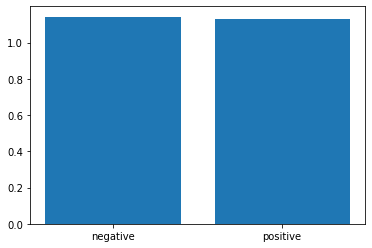

In [18]:
plt.bar(['negative', 'positive'], [neg.shape[0]/1e6, pos.shape[0]/1e6])